In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def load_and_preprocess_data(data_dir):
    image_files = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image_files.append(image_path)
                labels.append(label)
    return image_files, labels

In [4]:
data_dir = '/content/drive/MyDrive/skin cancer'
image_files, labels = load_and_preprocess_data(data_dir)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(image_files,
labels_encoded, test_size=0.2, random_state=42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import pathlib
import pandas as pd
import cv2
import PIL
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer/Trainisic2017")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer/Testisic2017")

# Define parameters
batch_size = 32
img_height = 180
img_width = 180
epochs = 20

# Function to remove hair using FFT
def remove_hair_fft(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # Create a mask to suppress high-frequency hair components
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0  # Suppress high frequencies

    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalize and convert to 3-channel
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = cv2.cvtColor(img_back.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    return img_back

# Function to apply CLAHE for contrast enhancement
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced

# Function to normalize illumination
def normalize_illumination(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_norm = cv2.equalizeHist(img_gray)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)
    return img_norm

# Function to apply all preprocessing steps
def preprocess_image(image):
    image = remove_hair_fft(image)  # Using FFT instead of morphological operations
    image = enhance_contrast(image)
    image = normalize_illumination(image)
    image = cv2.resize(image, (img_height, img_width))
    image = image / 255.0  # Normalize to [0,1]
    return image

# Function to preprocess dataset and save images
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_class_path = os.path.join(output_dir, class_folder)

        if not os.path.exists(save_class_path):
            os.makedirs(save_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if image is not None:
                image = preprocess_image(image)
                save_path = os.path.join(save_class_path, img_name)
                cv2.imwrite(save_path, (image * 255).astype(np.uint8))  # Convert back to 0-255
                print(f"Preprocessed: {img_name}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Preprocess images.
preprocessed_train_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
preprocessed_test_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Test"
preprocess_dataset(str(data_dir_train), preprocessed_train_dir)
preprocess_dataset(str(data_dir_test), preprocessed_test_dir)

Preprocessed: ISIC_0000544.jpg


KeyboardInterrupt: 

In [8]:
import os

def load_and_resize_image(file_path, target_size=(224, 224)):
    img = Image.open(file_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array

# Get the list of image files within the directory
train_image_files = [os.path.join(preprocessed_train_dir, f) for f in os.listdir(preprocessed_train_dir) if os.path.isfile(os.path.join(preprocessed_train_dir, f))]
test_image_files = [os.path.join(preprocessed_test_dir, f) for f in os.listdir(preprocessed_test_dir) if os.path.isfile(os.path.join(preprocessed_test_dir, f))]

# Now process these image files
X_train_processed = np.array([load_and_resize_image(file) for file in train_image_files])
X_test_processed = np.array([load_and_resize_image(file) for file in test_image_files])

In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',

)

Found 2000 files belonging to 3 classes.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="validation",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [14]:
# Load dataset (example: using image_dataset_from_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin cancer/Preprocessed_Train",  # Change this to your actual dataset path
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Access class names immediately after loading the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Now apply performance optimizations
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 3 classes.


In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="training",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 750 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet',
                      include_top=False,  # Exclude the fully connected layers of ResNet50
                      input_shape=(180, 180, 3))

# Freeze the layers of ResNet50 so that they are not trained
base_model.trainable = False

# Create the model
model = models.Sequential()

# Add the base ResNet50 model
model.add(base_model)

# Rescaling layer
model.add(layers.Rescaling(1./255))

# Flatten layer to convert the 3D outputs from ResNet50 into 1D
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(128, activation='relu'))

# Dropout layer
model.add(layers.Dropout(0.25))

# Output layer with softmax activation
model.add(layers.Dense(len(class_names), activation='softmax'))

# Summary of the model
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 6, 6, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,025,411 (125.98 MB)

 Trainable params: 9,437,699 (36.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the pre-trained ResNet50 model without the top layers (classification layers)
base_model = ResNet50(weights='imagenet',
                      include_top=False,  # Exclude fully connected layers
                      input_shape=(180, 180, 3))

# Freeze the ResNet50 layers (we don't want to train them)
base_model.trainable = False

# Create a new Sequential model
model = models.Sequential()

# Add the base ResNet50 model
model.add(base_model)

# Add a global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer
model.add(layers.Dense(128, activation='relu'))

# Add a dropout layer
model.add(layers.Dropout(0.25))

# Output layer with softmax for multi-class classification
model.add(layers.Dense(len(class_names), activation='softmax'))

# Compile the model
optimizer = 'adam'
loss_fn = "categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

# Set epochs and batch size
epochs = 20
batch_size = 32

# Train the model using the training and validation datasets
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.5815 - loss: 1.3012 - val_accuracy: 0.7000 - val_loss: 0.7752
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.6835 - loss: 0.8066 - val_accuracy: 0.7000 - val_loss: 0.7687
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6789 - loss: 0.7837 - val_accuracy: 0.7000 - val_loss: 0.7711
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6867 - loss: 0.7449 - val_accuracy: 0.7000 - val_loss: 0.7647
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.6753 - loss: 0.7439 - val_accuracy: 0.6925 - val_loss: 0.7711
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.6781 - loss: 0.7182 - val_accuracy: 0.6950 - val_loss: 0.7850
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.6914 - loss: 0.7043 - val_accuracy: 0.6900 - val_loss: 0.7809
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.6956 - loss: 0.6838 - val_accuracy: 

Text(0.5, 1.0, 'Training and Validation Loss')

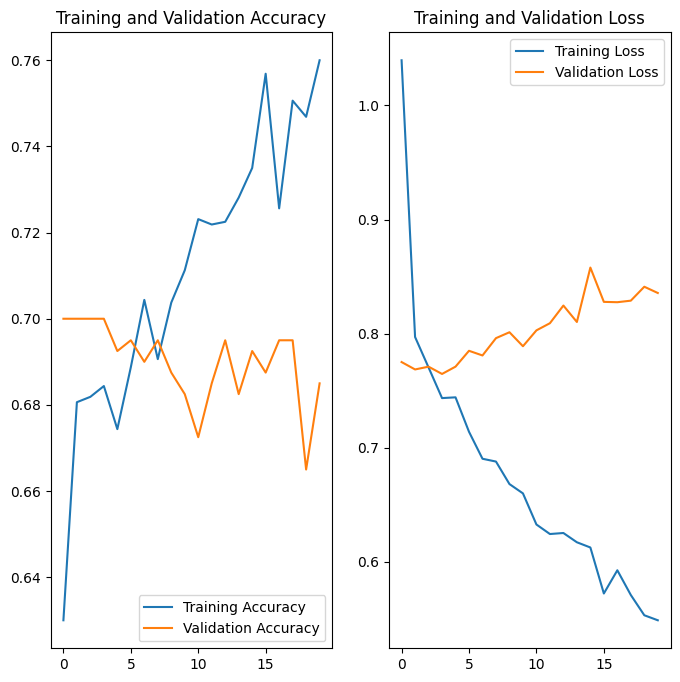

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7804 - loss: 0.4956
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7185 - loss: 0.7688
Accuracy:  0.784375011920929
Validation Accuracy:  0.6850000023841858
Loss:  0.49144017696380615
Validation Loss 0.835679829120636


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.9),
        layers.RandomZoom(0.9),
    ]
)

# Load Pre-trained ResNet50 Model
resnet_base = ResNet50(
    weights="imagenet",  # Use pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layer at the top
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model
resnet_base.trainable = False

# Build the Model
model = keras.Sequential([
    data_augmentation,
    resnet_base,
    layers.GlobalAveragePooling2D(),  # Pool the features from ResNet50
    layers.Dropout(0.5),              # Add regularization
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the Model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Summary of the Model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

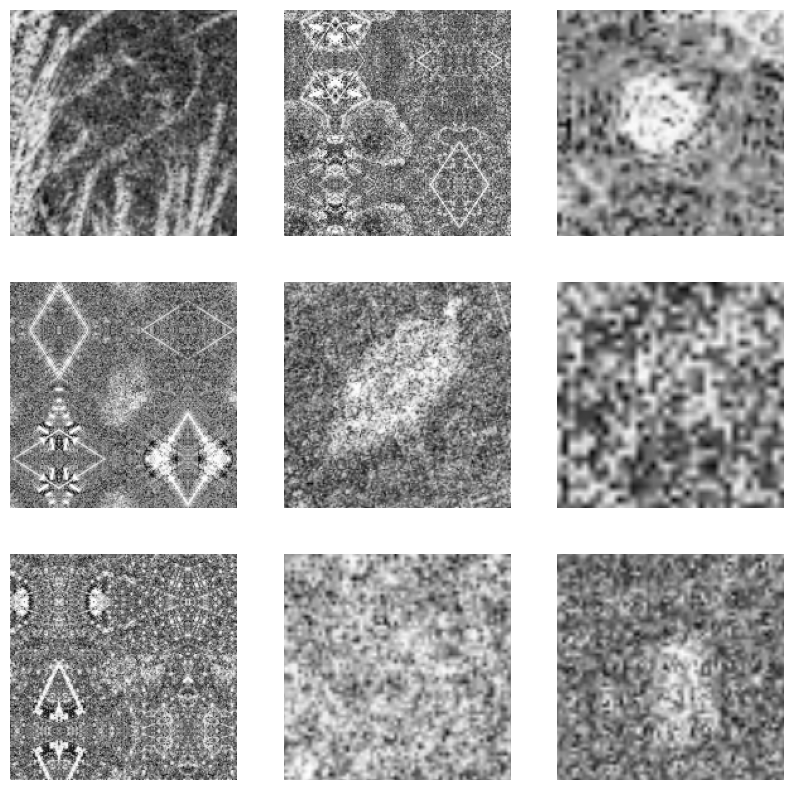

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming ResNet50 and data_augmentation are already defined
# Example visualization of augmented images
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):  # Fetch a batch of images from the training dataset
    for i in range(9):  # Generate and display 9 augmented images
        augmented_images = data_augmentation(images)  # Apply augmentation
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))  # Display the augmented image
        plt.axis("off")
plt.show()


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Assuming 'class_names' is already defined somewhere in your code
# class_names = ['class1', 'class2', ..., 'classN']

# Load the pre-trained ResNet50 model, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of ResNet50 so they are not trainable initially
base_model.trainable = False

# Build the model using ResNet50 as the base
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Rescaling Layer
    base_model,  # Add the pre-trained ResNet50 model
    layers.GlobalAveragePooling2D(),  # Pooling layer after the ResNet50 base
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Print the model summary to check the structure
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [24]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 263ms/step - accuracy: 0.5874 - loss: 1.1441 - val_accuracy: 0.7000 - val_loss: 0.8131
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.6942 - loss: 0.8445 - val_accuracy: 0.7000 - val_loss: 0.8159
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.6833 - loss: 0.8675 - val_accuracy: 0.7000 - val_loss: 0.8232
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.6846 - loss: 0.8682 - val_accuracy: 0.7000 - val_loss: 0.8161
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.6883 - loss: 0.8624 - val_accuracy: 0.7000 - val_loss: 0.8047
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.6839 - loss: 0.8548 - val_accuracy: 0.7000 - val_loss: 0.8206
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.6801 - loss: 0.8776 - val_accuracy: 0.7000 - val_loss: 0.8080
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6826 - loss: 0.8547 - val_accurac

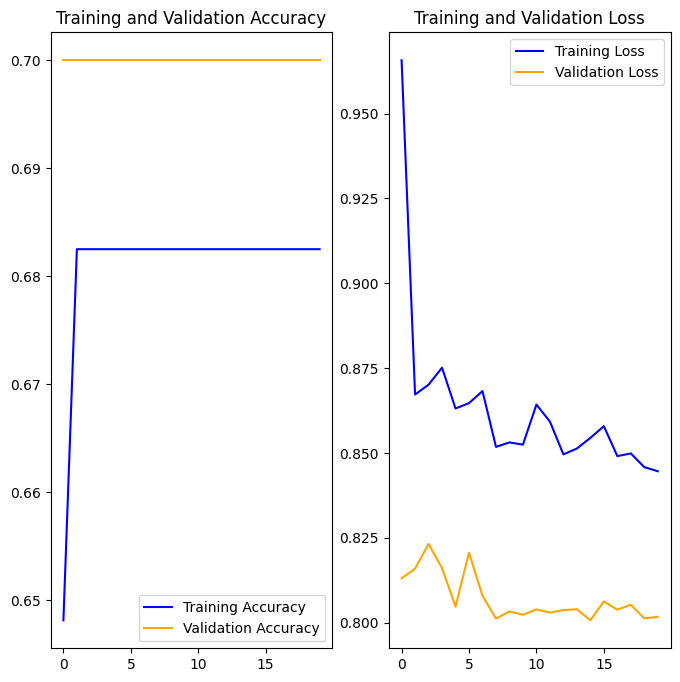

In [25]:
# Assuming 'history' contains training results from the ResNet50 model

acc = history.history['accuracy']          # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy

loss = history.history['loss']             # Training loss
val_loss = history.history['val_loss']     # Validation loss

epochs_range = range(epochs)  # Number of epochs used during training

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 8))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [26]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.6910 - loss: 0.8149
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7481 - loss: 0.7308
Accuracy:  0.6825000047683716
Validation Accuracy:  0.699999988079071
Loss:  0.8306094408035278
Validation Loss 0.8017492890357971


In [27]:
import os
import shutil

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"

# Create the main output directory if it doesn't exist
if not os.path.exists(augmented_output_path):
    os.makedirs(augmented_output_path)

# List of class names (directories for each class)
class_names = ['melanoma', 'nevus','seborrheic keratosis']

# Source path for the original training images
train_path = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"


for class_name in class_names:
  source_class_path = os.path.join(train_path, class_name)
  destination_class_path = os.path.join(augmented_output_path, class_name)

  # Create a folder for each class within Augmented_output
  if not os.path.exists(destination_class_path):
    os.makedirs(destination_class_path)

  # Copy all image files from each class in the Train folder to the corresponding class folder in Augmented_output
  for filename in os.listdir(source_class_path):
    if filename.endswith(".jpg"):
      source_file_path = os.path.join(source_class_path, filename)
      destination_file_path = os.path.join(destination_class_path, filename)
      shutil.copy2(source_file_path, destination_file_path)

print("Folders for each class created within Augmented_output, and all train images copied to the corresponding class folders.")

Folders for each class created within Augmented_output, and all train images copied to the corresponding class folders.


In [28]:
!pip install Augmentor

In [29]:
import Augmentor
import os

# Path to your dataset
path_to_training_dataset = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"

# List of class names (subdirectories in the training dataset)
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']
# Augmentation threshold (500 images per class)
target_count = 2500

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_path, class_name))

    # Get the current number of images in the class folder
    num_current_images = len(os.listdir(class_path))

    # Calculate how many images need to be augmented to reach 500
    num_samples = max(target_count - num_current_images, 0)

    # Apply augmentations
    if num_samples > 0:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        # Add other augmentation operations as needed (e.g., zoom, flip, etc.)
        p.sample(num_samples)

    print(f"Augmentation for {class_name} complete.")


Initialised with 374 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x180 at 0x7D198C7D5990>: 100%|██████████| 2126/2126 [00:31<00:00, 66.58 Samples/s]


Augmentation for melanoma complete.
Initialised with 1372 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/nevus.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7D1870159410>: 100%|██████████| 1128/1128 [00:15<00:00, 74.91 Samples/s]


Augmentation for nevus complete.
Initialised with 254 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7D18702BDB90>: 100%|██████████| 2246/2246 [00:32<00:00, 69.34 Samples/s]

Augmentation for seborrheic keratosis complete.


In [30]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 2500
Class: nevus, Number of augmented images: 2500
Class: seborrheic keratosis, Number of augmented images: 2500


In [31]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Resnet_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 2500
Class: nevus, Number of augmented images: 2500
Class: seborrheic keratosis, Number of augmented images: 2500


/content/drive/MyDrive/skin cancer/Resnet_output/melanoma/ISIC_0014832.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/nevus/ISIC_0000418.jpg
/content/drive/MyDrive/skin cancer/Resnet_output/seborrheic keratosis/ISIC_0012090.jpg


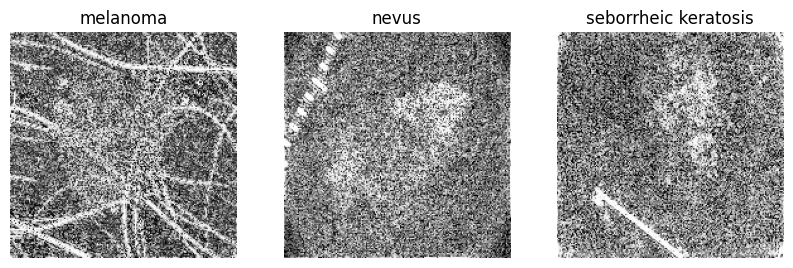

In [33]:
# Visualizing train data after augmentation
import os
import PIL
import matplotlib.pyplot as plt

# Assuming data_dir_train is the path to your training dataset
data_dir_train = "/content/drive/MyDrive/skin cancer/Resnet_output" # Add the actual path to your training data

class_names = [ 'melanoma', 'nevus', 'seborrheic keratosis']

plt.figure(figsize=(10, 10))
for i in range(3):
    files = os.listdir(os.path.join(data_dir_train,class_names[i]))
    image_path = os.path.join(data_dir_train,class_names[i],files[0])
    print(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image_path))
    plt.title(class_names[i])
    plt.axis("off")

In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 7500 files belonging to 3 classes.
Using 6000 files for training.


In [35]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)


Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

# Define input shape
input_shape = (180, 180, 3)

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation=relu),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation=relu),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes for ISIC dataset
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,155,267 (92.15 MB)

 Trainable params: 24,097,283 (91.92 MB)

 Non-trainable params: 57,984 (226.50 KB)

In [44]:
epochs = 30
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 156s 396ms/step - accuracy: 0.4013 - loss: 1.5520 - val_accuracy: 0.4227 - val_loss: 1.1539
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 220ms/step - accuracy: 0.5592 - loss: 1.0636 - val_accuracy: 0.5660 - val_loss: 0.9128
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - accuracy: 0.6756 - loss: 0.8009 - val_accuracy: 0.6673 - val_loss: 0.8417
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 225ms/step - accuracy: 0.7812 - loss: 0.5459 - val_accuracy: 0.7773 - val_loss: 0.5581
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 228ms/step - accuracy: 0.8921 - loss: 0.2935 - val_accuracy: 0.8167 - val_loss: 0.5023
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.9493 - loss: 0.1502 - val_accuracy: 0.8340 - val_loss: 0.4892
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.9657 - loss: 0.0970 - val_accuracy: 0.8400 - val_loss: 0.4579
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.9835 - loss: 

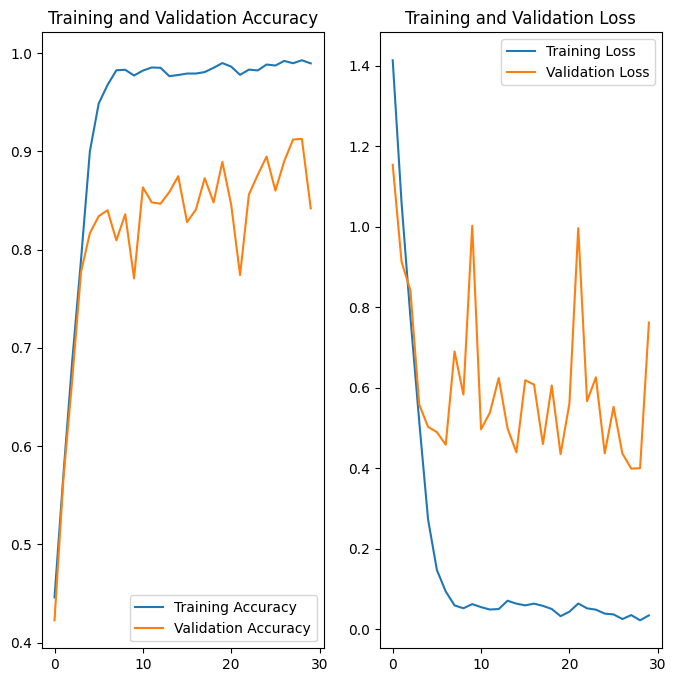

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9692 - loss: 0.1158
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8344 - loss: 0.8224
Accuracy:  0.9714999794960022
Validation Accuracy:  0.8420000076293945
Loss:  0.10012681782245636
Validation Loss 0.7617865204811096


In [52]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(224, 224),  # Change image size to (224, 224)
    label_mode='categorical',
    seed=123,
    subset="training",
    validation_split=0.2
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(224, 224),  # Change image size to (224, 224)
    label_mode='categorical',
    seed=123,
    subset="validation",
    validation_split=0.2
)

Found 7500 files belonging to 3 classes.
Using 6000 files for training.
Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


In [54]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define input shape (Increased to 224x224)
input_shape = (224, 224, 3)

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)

# Unfreeze last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),  # L2 Regularization added
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile model with AdamW optimizer
optimizer = AdamW(learning_rate=0.0001, weight_decay=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model (add callbacks)
model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=32, callbacks=[lr_scheduler])


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,155,267 (92.15 MB)

 Trainable params: 24,097,283 (91.92 MB)

 Non-trainable params: 57,984 (226.50 KB)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 158s 492ms/step - accuracy: 0.4001 - loss: 1.5634 - val_accuracy: 0.4327 - val_loss: 1.2973 - learning_rate: 1.0000e-04
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 90s 353ms/step - accuracy: 0.5713 - loss: 1.1243 - val_accuracy: 0.5207 - val_loss: 1.2250 - learning_rate: 1.0000e-04
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 325ms/step - accuracy: 0.6954 - loss: 0.8335 - val_accuracy: 0.6733 - val_loss: 0.9438 - learning_rate: 1.0000e-04
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - accuracy: 0.8084 - loss: 0.5381 - val_accuracy: 0.7547 - val_loss: 0.7028 - learning_rate: 1.0000e-04
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 320ms/step - accuracy: 0.9046 - loss: 0.3322 - val_accuracy: 0.8213 - val_loss: 0.5782 - learning_rate: 1.0000e-04
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 328ms/step - accuracy: 0.9488 - loss: 0.2116 - val_accuracy: 0.8127 - val_loss: 0.6308 - learning_rate: 1.0000e-04
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 3

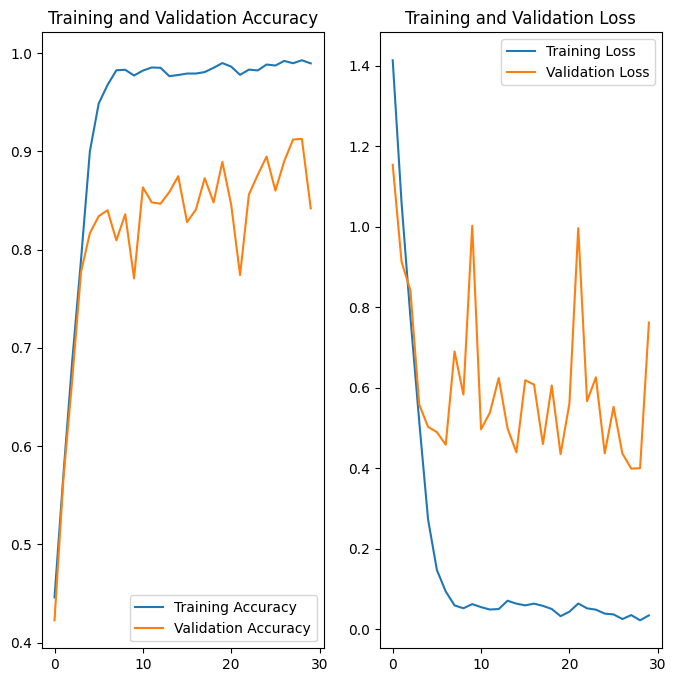

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 1.0000 - loss: 0.0598
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9165 - loss: 0.4744
Accuracy:  1.0
Validation Accuracy:  0.9240000247955322
Loss:  0.05973983183503151
Validation Loss 0.4010820686817169


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Actual Class seborrheic keratosis
Predicted Class seborrheic keratosis


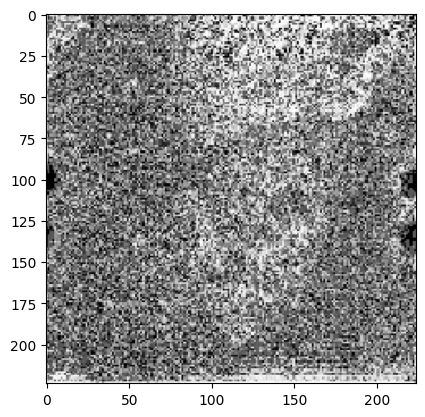

In [58]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
import os # make sure to import the os module
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_dir_test contains the path to your test dataset
data_dir_test = '/content/drive/MyDrive/skin cancer/Preprocessed_Test' # define the variable data_dir_test

Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(224,224,3)) # Changed target_size to (224, 224, 3)
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[2] +'\n'+ "Predicted Class "+pred_class )